In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_values=pd.read_excel("V Caffeine consumption and it's effect on sleep cycle. (Responses).xlsx")
data_values.head()

,Timestamp,Mention your age,Gender,Annual Income,You consume caffeine daily in which form ?,If you drink coffee everyday then how many cups?,If you drink tea everyday then how many cups?,How will your rate the quality of your sleep that you get after consuming caffeine,"How often did you feel unrested during the day, no matter how many hours of sleep you have had\n",How often did you wake up during the night and had trouble getting back to sleep after consuming caffeine,Were you diagnosed with any new health problem after consuming caffeine?,Do you feel pumped or energetic after consuming caffeine?,Are you feeling your are an caffeine addict?
0,2023-08-10 18:59:00.022,46 & Above,Male,4 Lakhs - 6 Lakhs,Soft Drink,4,3-4,Poor,Frequently,Frequently,BP,Maybe,Maybe
1,2023-08-10 19:14:55.244,19-25,Male,1 Lakh - 3 Lakhs,Tea,1-2,1-2,As usual,Rarely,Rarely,NaN,Maybe,Maybe
2,2023-08-10 19:48:12.650,19-25,Male,Less than 1 lakh,Tea,4,3-4,Very poor,Rarely,Rarely,NaN,Maybe,No
3,2023-08-10 19:55:17.045,19-25,Male,Less than 1 lakh,Tea,3-4,3-4,Poor,Rarely,Rarely,NaN,No,No
4,2023-08-10 20:05:59.771,19-25,Male,Less than 1 lakh,Tea,4,3-4,Poor,Rarely,Rarely,NaN,Yes,No


In [3]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                         --------------  -----         
 0   Timestamp                                                                                                      95 non-null     datetime64[ns]
 1   Mention your age                                                                                               95 non-null     object        
 2   Gender                                                                                                         95 non-null     object        
 3   Annual Income                                                                                                  95 non-null     object        
 4     You cons

In [61]:
# Assumptions:

# 1. All the recorded data is of the people consuming daily dose of caffiene in some or the other form.

In [4]:
#  Cups of coffee/tea (amount of caffeine consumption) + quality of sleep
# i.e. column no.s 5,6 & 7.

## creating sample data for hypothesis testing

In [5]:
data_values=data_values.replace({'If you drink coffee everyday then how many cups?' : { '1-2' : 1, '3-4' : 2, 4 : 3 ,'More than 4':3,'None':0}})
data_values=data_values.replace({'If you drink tea everyday then how many cups?' : { '1-2' : 1, '3-4' : 2, 4 : 3 ,'More than 4':3,'None':0}})

In [6]:
data_values

,Timestamp,Mention your age,Gender,Annual Income,You consume caffeine daily in which form ?,If you drink coffee everyday then how many cups?,If you drink tea everyday then how many cups?,How will your rate the quality of your sleep that you get after consuming caffeine,"How often did you feel unrested during the day, no matter how many hours of sleep you have had\n",How often did you wake up during the night and had trouble getting back to sleep after consuming caffeine,Were you diagnosed with any new health problem after consuming caffeine?,Do you feel pumped or energetic after consuming caffeine?,Are you feeling your are an caffeine addict?
0,2023-08-10 18:59:00.022,46 & Above,Male,4 Lakhs - 6 Lakhs,Soft Drink,3.0,2.0,Poor,Frequently,Frequently,BP,Maybe,Maybe
1,2023-08-10 19:14:55.244,19-25,Male,1 Lakh - 3 Lakhs,Tea,1.0,1.0,As usual,Rarely,Rarely,NaN,Maybe,Maybe
2,2023-08-10 19:48:12.650,19-25,Male,Less than 1 lakh,Tea,3.0,2.0,Very poor,Rarely,Rarely,NaN,Maybe,No
3,2023-08-10 19:55:17.045,19-25,Male,Less than 1 lakh,Tea,2.0,2.0,Poor,Rarely,Rarely,NaN,No,No
4,2023-08-10 20:05:59.771,19-25,Male,Less than 1 lakh,Tea,3.0,2.0,Poor,Rarely,Rarely,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2023-09-01 00:40:38.150,15-18,Male,7 Lakhs and above,Tea,3.0,3.0,Very poor,Frequently,Frequently,Diabetes,Yes,Yes
91,2023-09-01 00:41:01.856,26-45,Male,1 Lakh - 3 Lakhs,Energy Drink,NaN,1.0,Poor,Frequently,Rarely,Diabetes,Yes,Yes
92,2023-09-01 10:20:00.994,19-25,Female,Less than 1 lakh,Tea,2.0,2.0,Poor,Rarely,Rarely,NaN,Maybe,Yes
93,2023-09-01 10:23:14.667,19-25,Male,4 Lakhs - 6 Lakhs,Tea,1.0,1.0,Very poor,Rarely,Rarely,Hair loss,Yes,Yes


In [7]:
amount_of_caffiene_consumption=round((data_values['If you drink coffee everyday then how many cups?'].astype(int)+data_values['If you drink tea everyday then how many cups?'].astype(int))/2)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
amount_of_caffiene_consumption.head(20)

In [67]:
amount_of_caffiene_consumption.unique()

array([2., 1., 0., 3.])

In [68]:
data_values['How will your rate the quality of your sleep that you get after consuming caffeine'].unique()

array(['Poor', 'As usual', 'Very poor', 'Excellent'], dtype=object)

In [69]:
 # for quality of sleep :
# 'Excellent' = 0, 'As usual' = 1, 'Poor' = 2, 'Very poor' = 3

In [70]:
data_values=data_values.replace({'How will your rate the quality of your sleep that you get after consuming caffeine' : { 'Excellent' : 0, 'As usual' : 1, 'Poor' : 2, 'Very poor' : 3}})

In [71]:
data_values.head()

,Timestamp,Mention your age,Gender,Annual Income,You consume caffeine daily in which form ?,If you drink coffee everyday then how many cups?,If you drink tea everyday then how many cups?,How will your rate the quality of your sleep that you get after consuming caffeine,"How often did you feel unrested during the day, no matter how many hours of sleep you have had\n",How often did you wake up during the night and had trouble getting back to sleep after consuming caffeine,Were you diagnosed with any new health problem after consuming caffeine?,Do you feel pumped or energetic after consuming caffeine?,Are you feeling your are an caffeine addict?
0,2023-08-10 18:59:00.022,46 & Above,Male,4 Lakhs - 6 Lakhs,Soft Drink,3,2,2,Frequently,Frequently,BP,Maybe,Maybe
1,2023-08-10 19:14:55.244,19-25,Male,1 Lakh - 3 Lakhs,Tea,1,1,1,Rarely,Rarely,None,Maybe,Maybe
2,2023-08-10 19:48:12.650,19-25,Male,Less than 1 lakh,Tea,3,2,3,Rarely,Rarely,None,Maybe,No
3,2023-08-10 19:55:17.045,19-25,Male,Less than 1 lakh,Tea,2,2,2,Rarely,Rarely,None,No,No
4,2023-08-10 20:05:59.771,19-25,Male,Less than 1 lakh,Tea,3,2,2,Rarely,Rarely,None,Yes,No


In [72]:
the_sleep_pattern_of_individual=data_values['How will your rate the quality of your sleep that you get after consuming caffeine']

In [73]:
the_sleep_pattern_of_individual.head(20)

0     2
1     1
2     3
3     2
4     2
5     2
6     1
7     2
8     2
9     0
10    0
11    3
12    3
13    2
14    2
15    2
16    3
17    1
18    2
19    0
Name: How will your rate the quality of your sleep that you get after consuming caffeine, dtype: int64

In [74]:
the_sleep_pattern_of_individual.unique()

array([2, 1, 3, 0])

## T test :

In [75]:
# Importing library
import scipy.stats as stats

In [88]:
# relative t-test using statsmodels

stats.ttest_rel(a=the_sleep_pattern_of_individual, b=amount_of_caffiene_consumption)

TtestResult(statistic=1.9706959419921046, pvalue=0.051700346518578036, df=94)

In [80]:
# hypothesis :
# more amount of caffiene more problem in sleep


# null hypothesis
# above hypothesis is not true

# General Analysis of collected data's Graphs

In [89]:
sleep_Quality=data_values.groupby(['How will your rate the quality of your sleep that you get after consuming caffeine'])[['How will your rate the quality of your sleep that you get after consuming caffeine']].count()
sleep_Quality=sleep_Quality.rename(columns={'How will your rate the quality of your sleep that you get after consuming caffeine':'Count'})
sleep_Quality

,Count
How will your rate the quality of your sleep that you get after consuming caffeine,
0,7
1,11
2,38
3,39


<Axes: ylabel='How will your rate the quality of your sleep that you get after consuming caffeine'>

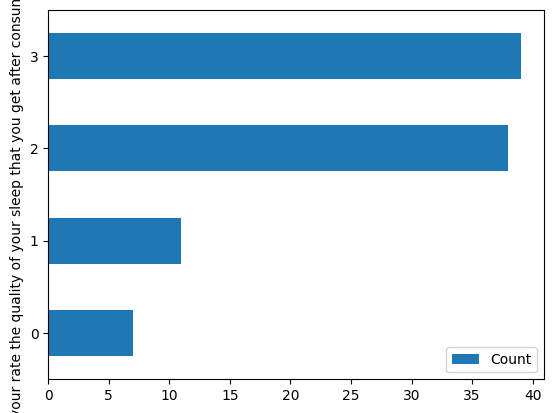

In [82]:
sleep_Quality.plot(kind='barh')

# 'Excellent' : 0, 'As usual' : 1, 'Poor' : 2, 'Very poor' : 3

In [53]:
age_gender=data_values.groupby(['Mention your age','Gender'])[['Gender']].count()
age_gender=age_gender.rename(columns={'Gender':'Gender Count'}).reset_index()
age_gender

,Mention your age,Gender,Gender Count
0,15-18,Female,1
1,15-18,Male,8
2,19-25,Female,17
3,19-25,Male,47
4,26-45,Female,6
5,26-45,Male,12
6,46 & Above,Male,4


<Axes: xlabel='Mention your age'>

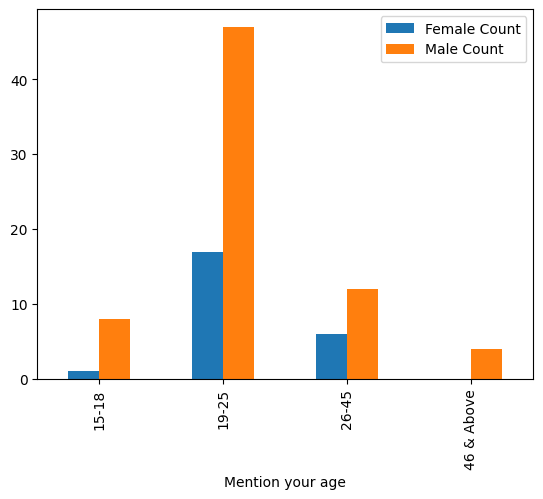

In [90]:
      # Pivot the table to create separate columns for male and female counts
df_pivot = age_gender.pivot(index='Mention your age', columns='Gender', values='Gender Count')

# Rename the columns
df_pivot.columns = ['Female Count', 'Male Count']

# Print the resulting DataFrame
df_pivot=df_pivot.reset_index()
df_pivot.plot(x="Mention your age", y=['Female Count',"Male Count"], kind="bar")

In [91]:
data_values=pd.read_excel("V Caffeine consumption and it's effect on sleep cycle. (Responses).xlsx")
data_values.head()

,Timestamp,Mention your age,Gender,Annual Income,You consume caffeine daily in which form ?,If you drink coffee everyday then how many cups?,If you drink tea everyday then how many cups?,How will your rate the quality of your sleep that you get after consuming caffeine,"How often did you feel unrested during the day, no matter how many hours of sleep you have had\n",How often did you wake up during the night and had trouble getting back to sleep after consuming caffeine,Were you diagnosed with any new health problem after consuming caffeine?,Do you feel pumped or energetic after consuming caffeine?,Are you feeling your are an caffeine addict?
0,2023-08-10 18:59:00.022,46 & Above,Male,4 Lakhs - 6 Lakhs,Soft Drink,4,3-4,Poor,Frequently,Frequently,BP,Maybe,Maybe
1,2023-08-10 19:14:55.244,19-25,Male,1 Lakh - 3 Lakhs,Tea,1-2,1-2,As usual,Rarely,Rarely,None,Maybe,Maybe
2,2023-08-10 19:48:12.650,19-25,Male,Less than 1 lakh,Tea,4,3-4,Very poor,Rarely,Rarely,None,Maybe,No
3,2023-08-10 19:55:17.045,19-25,Male,Less than 1 lakh,Tea,3-4,3-4,Poor,Rarely,Rarely,None,No,No
4,2023-08-10 20:05:59.771,19-25,Male,Less than 1 lakh,Tea,4,3-4,Poor,Rarely,Rarely,None,Yes,No


In [92]:
age_unrested=data_values.groupby(['Mention your age','How will your rate the quality of your sleep that you get after consuming caffeine'])[['How will your rate the quality of your sleep that you get after consuming caffeine']].count()

In [93]:
age_unrested=age_unrested.rename(columns={'How will your rate the quality of your sleep that you get after consuming caffeine':'Count of people'}).reset_index()
age_unrested

,Mention your age,How will your rate the quality of your sleep that you get after consuming caffeine,Count of people
0,15-18,As usual,1
1,15-18,Excellent,1
2,15-18,Poor,3
3,15-18,Very poor,4
4,19-25,As usual,8
5,19-25,Excellent,4
6,19-25,Poor,25
7,19-25,Very poor,27
8,26-45,As usual,2
9,26-45,Excellent,2


In [94]:
age_unrested['Count of people'].sum()

95

<Axes: xlabel='Mention your age'>

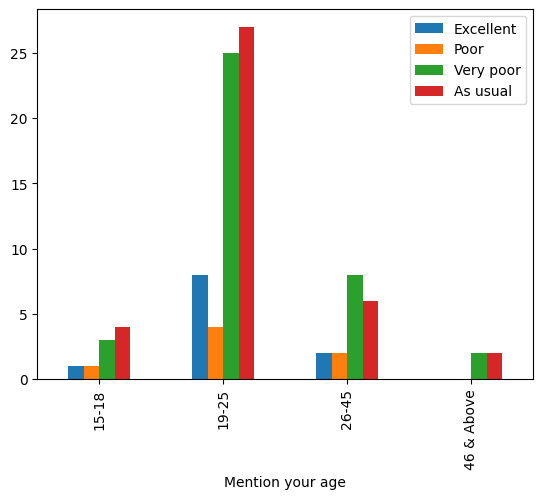

In [95]:
df_pivot_unrested= age_unrested.pivot(index='Mention your age', columns='How will your rate the quality of your sleep that you get after consuming caffeine', values='Count of people')

# Rename the columns
df_pivot_unrested.columns = ['Excellent', 'Poor', 'Very poor', 'As usual']

# Print the resulting DataFrame
df_pivot_unrested=df_pivot_unrested.reset_index()
df_pivot_unrested.plot(x="Mention your age", y=['Excellent', 'Poor', 'Very poor', 'As usual'], kind="bar")

# Rule Based Model:

# *******   Inputs    *********      
(Varibles which are considered for prediction using rule based model)



## Caffeine consumption inputs

In [3]:
#Starting the input values
intake_form=0
no_of_cups=0
caffeine_score=0

caffeine_forms={2:"Tea", 4:"Coffee", 1:"Soda", 3:"Energy Drink"}
caffeine_forms_amounts={2:47, 4:96, 1:22, 3:72, 0:0}


#  Amount of Caffeine intake you have on daily basis in the measure of cups
print("Do you consume Caffeine on daily basis ?")
print("Answer in y or n")
caffiene_intake_yes_or_no=str(input())
caffiene_intake_meter = 0

while caffiene_intake_meter ==0:
    if caffiene_intake_yes_or_no =="y" or caffiene_intake_yes_or_no =="Y":
        print("In which form do you consume caffeine daily ?")
        print("Answer from the following options:")
        print("Soda : 1 \n Tea : 2 \n Energy Drink : 3 \n Coffee : 4 \n")
        intake_form = int(input())
        print("Enter the number of cups you consume of "+ caffeine_forms[intake_form] +" on daily basis \n")
        no_of_cups = int(input())
        print("Do you consume caffeine in any other form as well ?")
        print("Answer in y or n \n")
        caffiene_intake_yes_or_no=str(input())
    else:
        caffiene_intake_meter = 1
        
        
caffeine_score = caffeine_forms_amounts[intake_form]*no_of_cups
caffeine_score

Do you consume Caffeine on daily basis ?
Answer in y or n
y
In which form do you consume caffeine daily ?
Answer from the following options:
Soda : 1 
 Tea : 2 
 Energy Drink : 3 
 Coffee : 4 

4
Enter the number of cups you consume of Coffee on daily basis 

4
Do you consume caffeine in any other form as well ?
Answer in y or n 

n


384

## Stress and Screen time Inputs

In [4]:
#starting the variables
stress_level=0
age = 0
tired = ""
screen_time = 0


age_dict={1:0, 2:1, 3:2, 4:0}


print("Mention your age Group \n")
print("Answer from the following options: \n")
print("15 - 18 : 1 \n 19 - 24 : 2 \n 25 - 45 : 3 \n 46 & above : 4 \n")
age = int(input())
print("Do you feel tired all day long on daily basis ?")
print("Answer in y or n \n")
tired = str(input())
print("How many hours of screen time do you have on daily basis")
screen_time=int(input())
if age >1:
    print("How much will you rate you job being stressfull on the scale of 1 to 5 ?")
    stress_level = int(input())

if tired == "y" or "Y":
    tired=1
else:
    tired=0
    
if screen_time > 2:
    screen_time=0
    screen_time= 1+ (screen_time - 2)//3
else:
    screen_time = 1


stress_score= age_dict[age] + tired + screen_time + stress_level
stress_score

Mention your age Group 

Answer from the following options: 

15 - 18 : 1 
 19 - 24 : 2 
 25 - 45 : 3 
 46 & above : 4 

1
Do you feel tired all day long on daily basis ?
Answer in y or n 

n
How many hours of screen time do you have on daily basis
3


4

## Sleep Schedule Inputs


In [8]:
sleep_score = 0

print("Answer the below question in 24 hours time i.e. \n 1 p.m = 13 ,\n 2 p.m = 14 \n similarly.. \n 1 a.m = 1, \n 2 a.m = 2 \n")
print("***Note*** \n if you sleep at 10.30 p.m or before, consider it 10 and input value 22 \n If you sleep after 10.30 p.m consider it 11 and input value 23 \n")
print("At what time do you sleep at night")
sleep_in=int(input())
print("At what time do you wake up in the morning ?")
sleep_out=int(input())
if sleep_in >= sleep_out:
    sleep_time = 24 - abs(sleep_in - sleep_out)
else:
    sleep_time = abs(sleep_in - sleep_out) 



if sleep_in < 20:
    sleep_score += 2
if sleep_out > 10:
    sleep_score += 1
if sleep_time < 7:
    sleep_score += 2
sleep_score

Answer the below question in 24 hours time i.e. 
 1 p.m = 13 ,
 2 p.m = 14 
 similarly.. 
 1 a.m = 1, 
 2 a.m = 2 

***Note*** 
 if you sleep at 10.30 a.m or before, consider it 10 and input value 22 
 If you sleep after 10.30 a.m consider it 11 and input value 23 

At what time do you sleep at night
2
At what time do you wake up in the morning ?
11


3

## Results

In [6]:
good="Your sleep quality is not being affected"
bad="Your sleep quality is being affected !"
sleep_quality_score=0
caffeine_quality_score=0
stress_quality_score=0
# Check if sleep quality is poor or very poor
if sleep_score == 2 or 3 :
    sleep_quality_score+=1
elif sleep_score >= 4 :
    sleep_quality_score+=2

# Check if caffeine consumption is high
if caffeine_score > 200:
    caffeine_quality_score+=1

# Check if stressed frequently
if stress_score > 2 and stress_score<= 4:
    stress_quality_score+=1
elif stress_score >4:
    stress_quality_score+=2

if sleep_quality_score + caffeine_quality_score + stress_quality_score > 2:
    print(bad) 
else:
    print(good)

    
print("To know the reason run below cell")

Your sleep quality is being affected !
To know the reason run below cell


<AxesSubplot:>

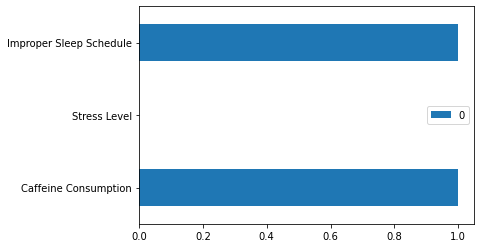

In [7]:
df=pd.DataFrame({'Caffeine Consumption':[caffeine_quality_score],"Stress Level":[stress_quality_score],"Improper Sleep Schedule":[sleep_quality_score]})
df.T.plot(kind='barh')